# Q5


In [276]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stat

## b.

In [446]:
def single_queue_s (n=1000):
    avg_response_time = np.zeros(100)
    std_response_time = np.zeros(100)
    server_utilization = np.zeros(100)

    for j in range (100):
        seed = np.random.randint(0, 1000) 
        np.random.seed(seed)
        ntasks = n
        request_start = np.zeros(ntasks)
        request_end = np.zeros(ntasks)
        request_times = np.zeros(ntasks)
        response_times = {"Long": [], "Short": []}
        arrival_time = np.zeros(ntasks)

        for i in range(ntasks):
            inter_arrival_time=stat.poisson.rvs(5)
            request_type = stat.bernoulli.rvs(0.9)
            arrival_time[i] = arrival_time[i-1] + inter_arrival_time
            if (request_type == 1) :
                request_times[i] = stat.randint.rvs(3,20)
                request_type="Short"
            else :
                request_times[i] = stat.randint.rvs(200,1000)
                request_type="Long"

            if (i == 0):
                request_start[i] = arrival_time[i]
            else :
                request_start[i]=max(request_end[i-1],arrival_time[i])

            request_end[i]=request_start[i]+request_times[i]
            response_times[request_type].append(request_end[i] - arrival_time[i])

        
        avg_server_utilization=np.sum(request_times)/request_end[-1]
        
        server_utilization[j]=avg_server_utilization
        short_response=response_times["Short"]
        long_response=response_times["Long"]
        concat=np.hstack((short_response,long_response))
        avg_response=np.mean(concat)
        std_response=np.std(concat)
        avg_response_time[j]=avg_response
        std_response_time[j]=std_response

    return avg_response_time, std_response_time, server_utilization






In [447]:
number_tasks = [100,500,1000,5000,10000]
results=[single_queue_s(n) for n in number_tasks]

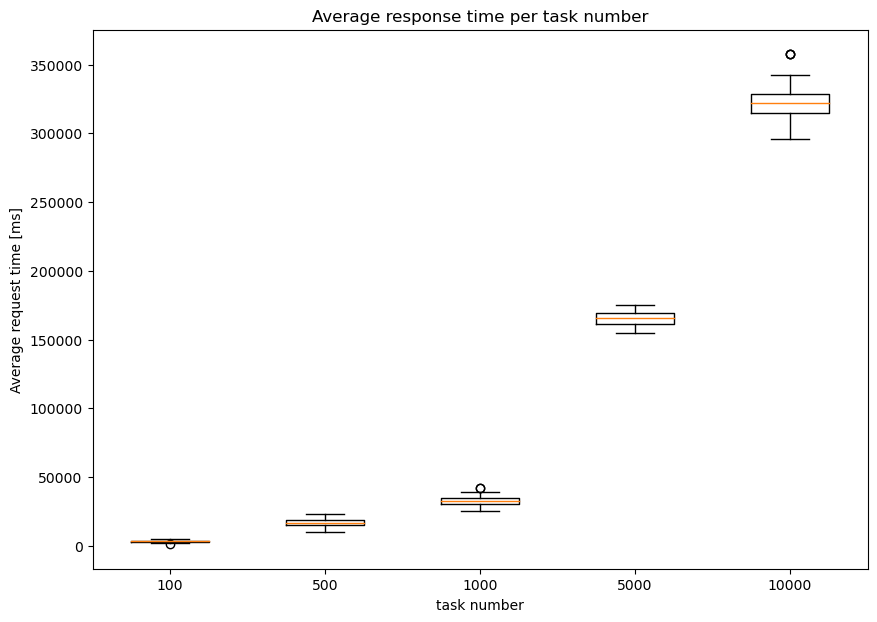

In [448]:
fig = plt.figure(figsize =(10, 7))
data=[results[i][0] for i in range(5)]
plt.boxplot(data,labels=number_tasks)
plt.ylabel('Average request time [ms]')
plt.xlabel('task number')
plt.title("Average response time per task number")
plt.show()

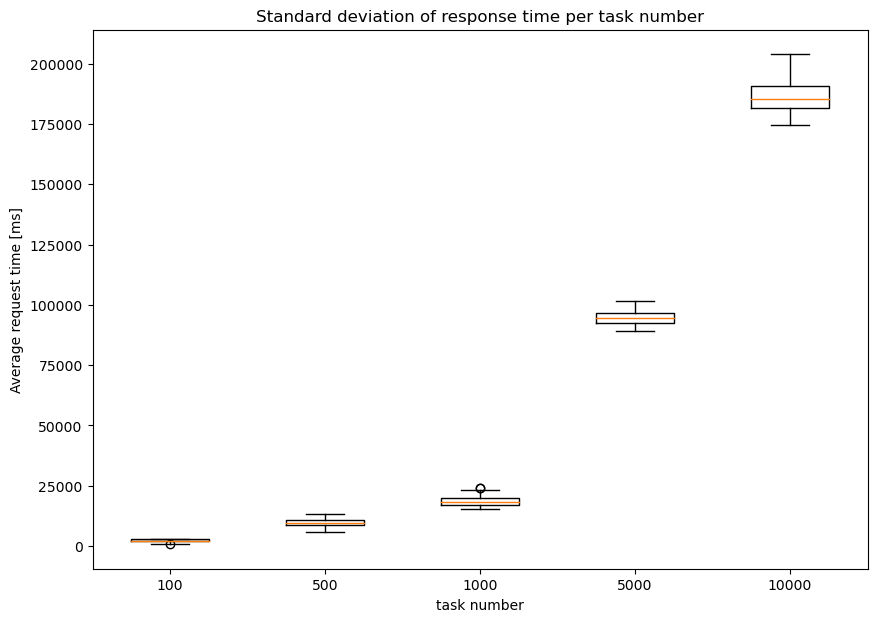

In [449]:
fig = plt.figure(figsize =(10, 7))
data=[results[i][1] for i in range(5)]
plt.boxplot(data,labels=number_tasks)
plt.ylabel('Average request time [ms]')
plt.xlabel('task number')
plt.title("Standard deviation of response time per task number")
plt.show()

In [450]:
print("the average utilisation is",np.mean(results[2][2]))

the average utilisation is 0.999922491347222


As we can see here, the average response time keeps increasing with the number of tasks. The system cannot handle the number of incoming requests due to the existence of only a single server even by using full utilization. We call this type of systems an unstable system caracterised by the mean arrival rate being less than the mean service rate $\lambda < m\mu$

## c.

In [451]:
def multiple_servers (M_server=1,n=1000):
    avg_response_time = np.zeros(100)
    std_response_time = np.zeros(100)
    ntasks = n
    for j in range(100):
        request_start = np.zeros(ntasks)
        request_end = np.zeros(ntasks)
        request_times = np.zeros(ntasks)
        arrival_time = np.zeros(ntasks)
        M=M_server
        server_time=np.zeros(M)
        response_times = {"Long": [], "Short": []}
        seed = np.random.randint(0, 1000) 
        np.random.seed(seed)
        
        for i in range(ntasks):
            
            inter_arrival_time=stat.poisson.rvs(5)
            request_type = stat.bernoulli.rvs(0.9)
            arrival_time[i] = arrival_time[i-1] + inter_arrival_time

            if (request_type == 1) :
                request_times[i] = stat.randint.rvs(3,20)
                request_type="Short"
            else :
                request_times[i] = stat.randint.rvs(200,1000)
                request_type="Long"
            if (i == 0):
                min_index=0
                request_start[0] = arrival_time[0]
            else :
                min_index = np.argmin(server_time)
                request_start[i]=max(server_time[min_index],arrival_time[i])
            
            request_end[i]=request_start[i]+request_times[i]
            response_times[request_type].append(request_end[i] - arrival_time[i])
            server_time[min_index] = request_end[i]
        short_response=response_times["Short"]
        long_response=response_times["Long"]
        concat=np.hstack((short_response,long_response))
        avg_response=np.mean(concat)
        std_response=np.std(concat)
        avg_response_time[j]=avg_response
        std_response_time[j]=std_response
    return avg_response_time, std_response_time


        
    
    
    


In [452]:
number_servers = [i for i in range(10,30)]
results=[multiple_servers(n) for n in number_servers]

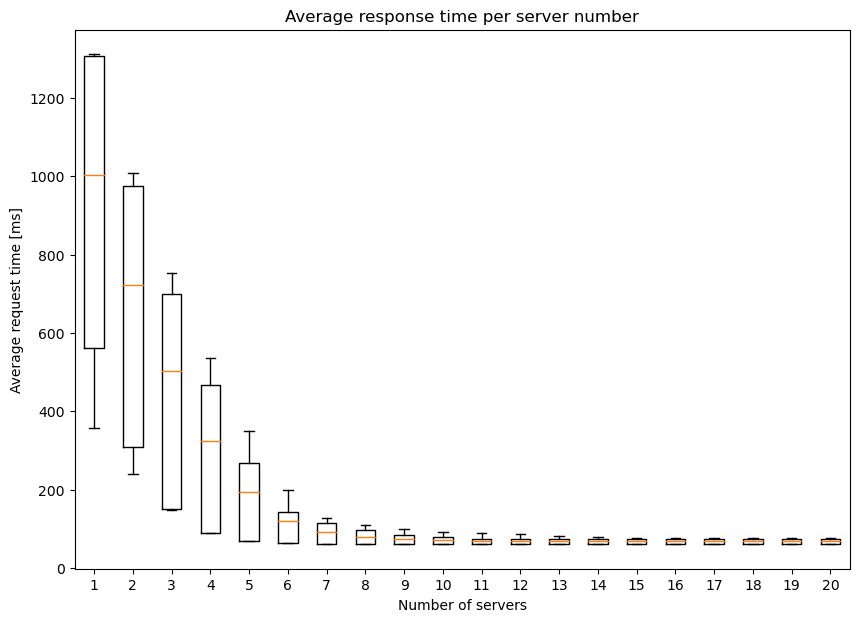

In [453]:
fig = plt.figure(figsize =(10, 7))
data=[results[i][0] for i in range(len(results))]
plt.boxplot(data)
plt.ylabel('Average request time [ms]')
plt.xlabel('Number of servers')
plt.title("Average response time per server number")
plt.show()

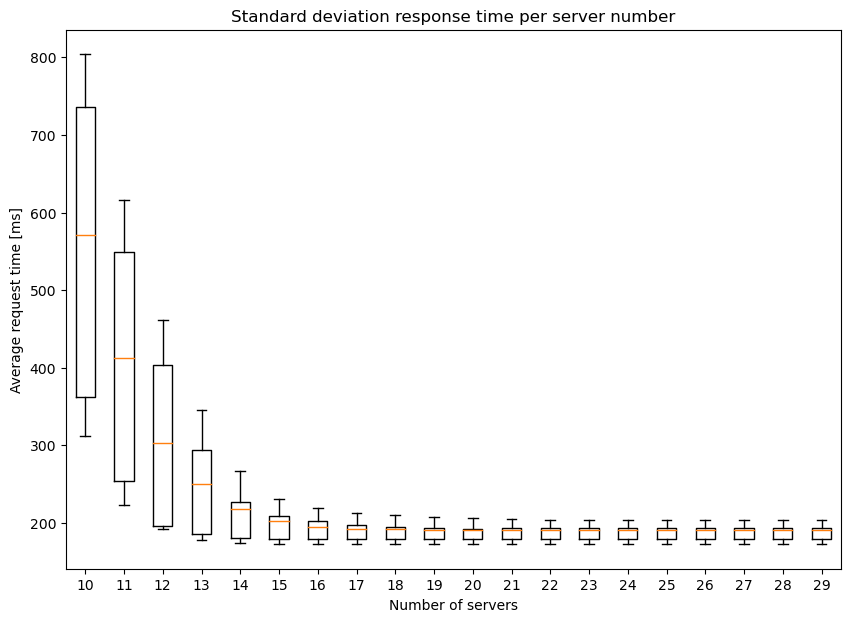

In [454]:
fig = plt.figure(figsize =(10, 7))
data=[results[i][1] for i in range(len(results))]
plt.boxplot(data,labels=number_servers)
plt.ylabel('Average request time [ms]')
plt.xlabel('Number of servers')
plt.title("Standard deviation response time per server number")
plt.show()

Reaching 30 ms per request is impossible to achieve using a single queue multiple servers, the long requests impact heavily the service time. Even when we increase the number of servers to infinity we will be limited by a lower bound which is the average service time per job which is about 70.35 ms

## d.

In [405]:
def multiple_servers_multi_queues(m=1,n=1000):
    avg_response_time = np.zeros(100)
    std_response_time = np.zeros(100)
    ntasks = n

    for j in range(100):
        seed = np.random.randint(0, 1000) 
        np.random.seed(seed)
        request_start = np.zeros(ntasks)
        request_end = np.zeros(ntasks)
        request_times = np.zeros(ntasks)
        response_times = {"Long": [], "Short": []}
        arrival_time = np.zeros(ntasks)
        M_Q=m
        queue = {i:[] for i in range(0,M_Q)}

        for i in range(ntasks):
            inter_arrival_time=stat.poisson.rvs(5)
            request_type = stat.bernoulli.rvs(0.9)
            arrival_time[i] = arrival_time[i-1] + inter_arrival_time

            if (request_type == 1) :
                request_times[i] = stat.randint.rvs(3,20)
                request_type= "Short"
            else :
                request_times[i] = stat.randint.rvs(200,1000)
                request_type= "Long"
            
            if (i == 0): 
                min_index = 0
                request_start[0] = arrival_time[0]
            else :
                in_queue=[sum(np.array(q)>arrival_time[i]) for q in list(queue.values())]
                min_index = np.argmin(in_queue)
                if (len(queue[min_index]) != 0): 
                    request_start[i]=max(queue[min_index][-1],arrival_time[i])
                else :
                    request_start[i]=arrival_time[i]
            request_end[i] = request_start[i]+request_times[i]
            response_times[request_type].append(request_end[i] - arrival_time[i])
            queue[min_index].append(request_end[i])
        short_response=response_times["Short"]
        long_response=response_times["Long"]
        concat=np.hstack((short_response,long_response))
        avg_response=np.mean(concat)
        std_response=np.std(concat)
        avg_response_time[j]=avg_response
        std_response_time[j]=std_response
    return avg_response_time, std_response_time


        


        

In [406]:
number_servers = [i for i in range(10,30)]
results=[multiple_servers_multi_queues(n) for n in number_servers]

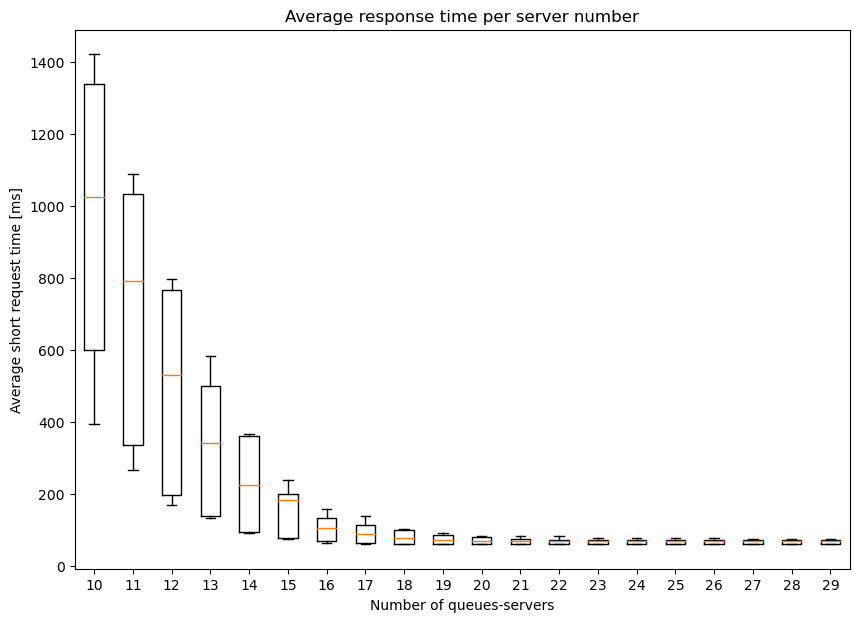

In [407]:
fig = plt.figure(figsize =(10, 7))
data=[results[i][0] for i in range(len(results))]
plt.boxplot(data,labels=number_servers)
plt.ylabel('Average short request time [ms]')
plt.title("Average response time per queues-server number")
plt.xlabel('Number of queues-servers')
plt.show()

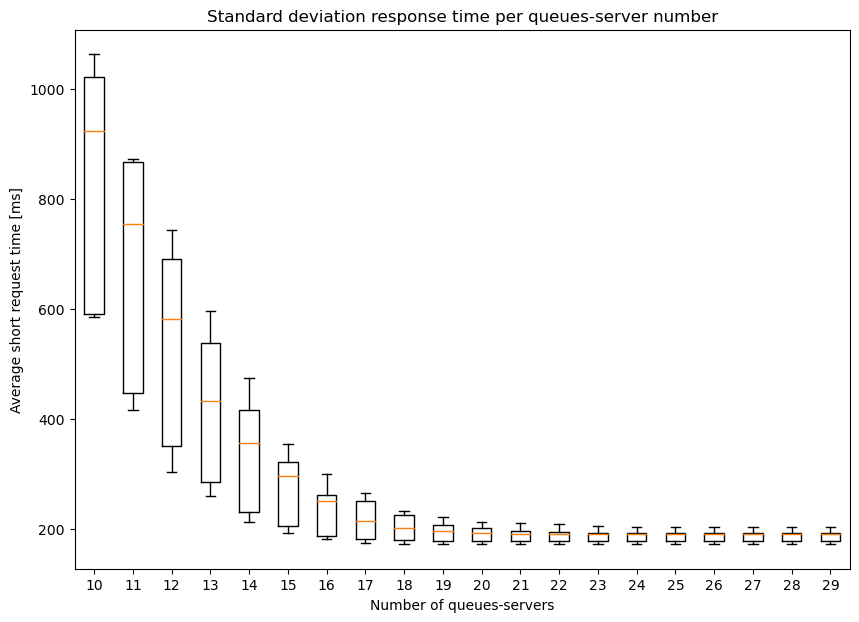

In [408]:
fig = plt.figure(figsize =(10, 7))
data=[results[i][1] for i in range(len(results))]
plt.boxplot(data,labels=number_servers)
plt.ylabel('Average request time [ms]')
plt.title("Standard deviation response time per queues-server number")
plt.xlabel('Number of queues-servers')
plt.show()

Same goes for the multiple queues multiple servers system we still cannot go under the job service lower bound

## e.

In [409]:
def rr_multiple_servers_multi_queues(m=1,n=1000):
    avg_response_time = np.zeros(100)
    std_response_time = np.zeros(100)
    ntasks = n

    for j in range(100):
        seed = np.random.randint(0, 1000) 
        np.random.seed(seed)
        ntasks = n
        request_start = np.zeros(ntasks)
        request_end = np.zeros(ntasks)
        request_times = np.zeros(ntasks)
        response_times = {"Long": [], "Short": []}
        arrival_time = np.zeros(ntasks)
        M_Q=m
        queue = {i:[] for i in range(0,M_Q)}

        for i in range(ntasks):
            inter_arrival_time=stat.poisson.rvs(5)
            request_type = stat.bernoulli.rvs(0.9)
            arrival_time[i] = arrival_time[i-1] + inter_arrival_time

            if (request_type == 1) :
                request_times[i] = stat.randint.rvs(3,20)
                request_type= "Short"
            else :
                request_times[i] = stat.randint.rvs(200,1000)
                request_type= "Long"
            
            if (i == 0): 
                index = 0
                request_start[0] = arrival_time[0]
            else :
                in_queue=[sum(np.array(q)>arrival_time[i]) for q in list(queue.values())]
                index = (index+1)%M_Q
                if (len(queue[index]) != 0): 
                    request_start[i]=max(queue[index][-1],arrival_time[i])
                else :
                    request_start[i]=arrival_time[i]
            request_end[i] = request_start[i]+request_times[i]
            response_times[request_type].append(request_end[i] - arrival_time[i])
            queue[index].append(request_end[i])
        short_response=response_times["Short"]
        long_response=response_times["Long"]
        concat=np.hstack((short_response,long_response))
        avg_response=np.mean(concat)
        std_response=np.std(concat)
        avg_response_time[j]=avg_response
        std_response_time[j]=std_response
    return avg_response_time, std_response_time

        


In [410]:
number_servers = [i for i in range(10,30)]
results=[rr_multiple_servers_multi_queues(n) for n in number_servers]

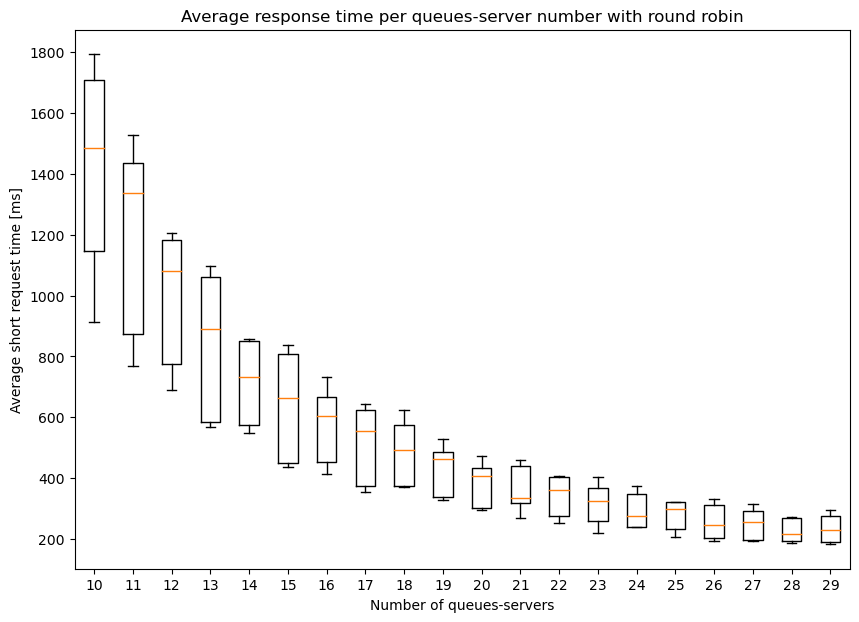

In [411]:
fig = plt.figure(figsize =(10, 7))
data=[results[i][0] for i in range(len(results))]
plt.boxplot(data,labels=number_servers)
plt.ylabel('Average request time [ms]')
plt.xlabel('Number of queues-servers')
plt.title("Average response time per queues-server number with round robin")
plt.show()

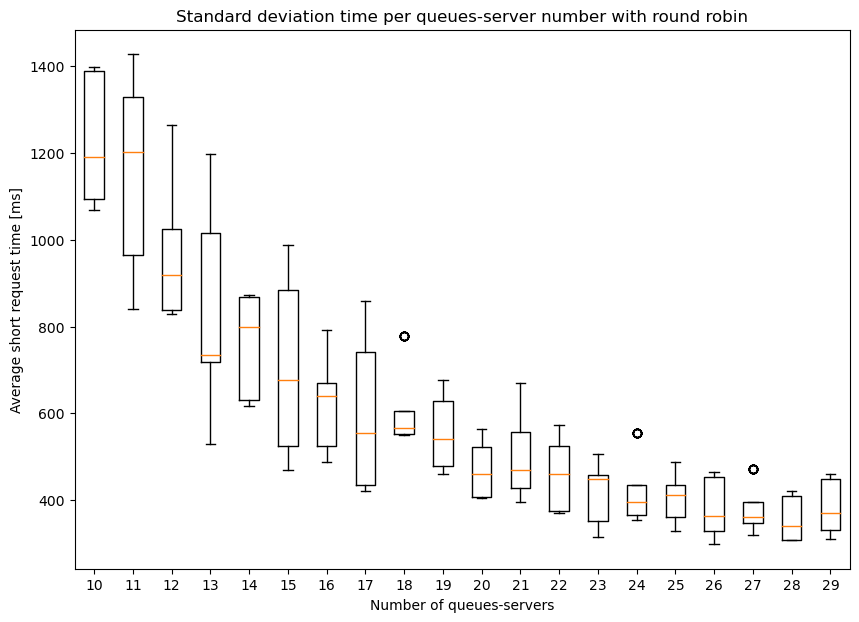

In [412]:
fig = plt.figure(figsize =(10, 7))
data=[results[i][1] for i in range(len(results))]
plt.boxplot(data,labels=number_servers)
plt.ylabel('Average request time [ms]')
plt.xlabel('Number of queues-servers')
plt.title("Standard deviation time per queues-server number with round robin")
plt.show()

## f.

In [441]:
def double_queque (mlong,mshort,n=1000):
    avg_short = np.zeros(100)
    avg_long = np.zeros(100)
    std_short = np.zeros(100)
    std_long = np.zeros(100)
    server_utilization = np.zeros(100)

    for j in range (100):
        seed = np.random.randint(0, 1000) 
        np.random.seed(seed)
        ntasks = n
        response_times = {"Long": [], "Short": []}
        arrival_time = np.zeros(ntasks)
        server_time=np.zeros(M)
        queues = {"Long": np.zeros(mlong), "Short": np.zeros(mshort)}
        arrival= {"Long": [], "Short": []}
        time_taken= {"Long": [], "Short": []}

        for i in range(ntasks):
            inter_arrival_time=stat.poisson.rvs(5)
            request_type = stat.bernoulli.rvs(0.9)
            arrival_time[i] = arrival_time[i-1] + inter_arrival_time

            if (request_type == 1) :
                arrival["Short"].append(arrival_time[i])
                time_taken["Short"].append(stat.randint.rvs(3,20))
            else :
                time_taken["Long"].append(stat.randint.rvs(200,1000))
                arrival["Long"].append(arrival_time[i])
        
        for i in range(len(queues["Long"])):
            if i==0 :
                min_index=0
                request_start = arrival["Long"][0]
            else :
                min_index = np.argmin(queues["Long"])
                request_start=max(queues["Long"][min_index],arrival["Long"][i])
            request_end=request_start+time_taken["Long"][i]
            response_times["Long"].append(request_end - arrival["Long"][i])
            queues["Long"][min_index]= request_end

        for i in range(len(queues["Short"])):
            if i==0 :
                min_index=0
                request_start= arrival["Short"][0]
            else :
                min_index = np.argmin(queues["Short"])
                request_start=max(queues["Short"][min_index],arrival["Short"][i])
            request_end=request_start+time_taken["Short"][i]
            response_times["Short"].append(request_end - arrival["Short"][i])
            queues["Short"][min_index]= request_end
        
        
            

        avg_short_time = np.mean(response_times["Short"])
        std_short_time = np.std(response_times["Short"])
        avg_long_time = np.mean(response_times["Long"])
        std_long_time = np.std(response_times["Long"])
        avg_short[j]=avg_short_time
        std_short[j]=std_short_time
        avg_long[j]=avg_long_time
        std_long[j]=std_long_time

    return avg_short, std_short, avg_long, std_long, server_utilization


In [442]:
number_servers = [i for i in range(1,10)]
results=[double_queque(n,n) for n in number_servers]

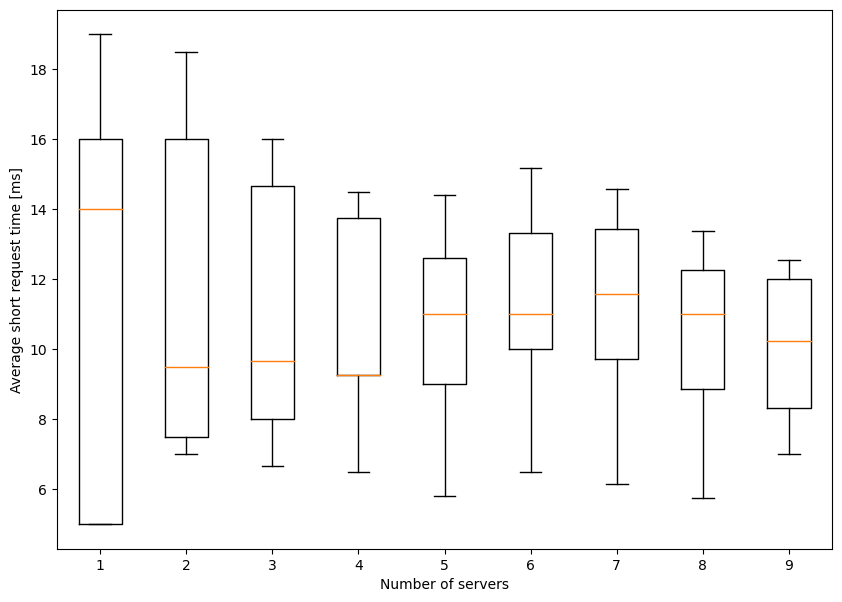

In [443]:
fig = plt.figure(figsize =(10, 7))
data=[results[i][0] for i in range(len(results))]
plt.boxplot(data,labels=number_servers)
plt.ylabel('Average short request time [ms]')
plt.xlabel('Number of servers')
plt.show()

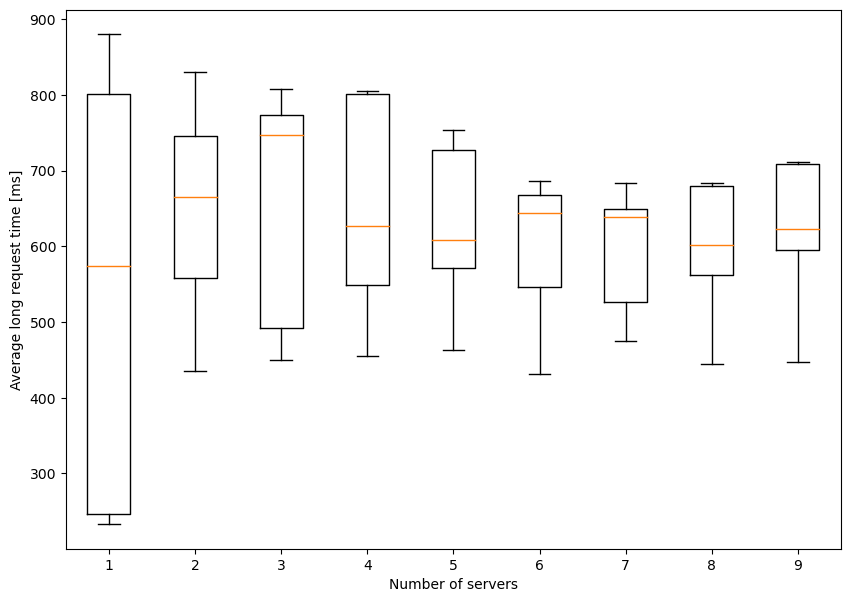

In [444]:
fig = plt.figure(figsize =(10, 7))
data=[results[i][2] for i in range(len(results))]
plt.boxplot(data,labels=number_servers)
plt.ylabel('Average long request time [ms]')
plt.xlabel('Number of servers')
plt.show()

If we provide a single server for short request queue and one server for the short long queue queue we will achieve the recommeneded response time.

# Comparaison

- For the single queue single server, the systeme is not stable making it diverge when the number of tasks grows high
- For system c, even after adding more servers the service time is still limited by the average service time which is high by itself due to the expensive service time of long requests
- System D and E, still performs slow with no improvement due to the non seperation of long and short requests. System D showes better performance because shortest queue algorithm minimizes the waiting time.
- System F seperate the two types of request by using two queues which allows the System to achieve it's full capacity